In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
clade34 = pd.read_csv('../data/2.3.4.4fAreaDTA_MJs_bi.txt')
clade34['dateinyear'] = clade34['date'] - np.floor(clade34['date'])
clade34['od'] = clade34['origin'] + '-' + clade34['destination']
clade34['days'] = clade34['dateinyear']*365

conditions = [
    (clade34['days'] < 32),
    (clade34['days'] >= 32) & (clade34['days'] < 60),
    (clade34['days'] >= 60) & (clade34['days'] < 91),
    (clade34['days'] >= 91) & (clade34['days'] < 121),
    (clade34['days'] >= 121) & (clade34['days'] < 152),
    (clade34['days'] >= 152) & (clade34['days'] < 182),
    (clade34['days'] >= 182) & (clade34['days'] < 213),
    (clade34['days'] >= 213) & (clade34['days'] < 244),
    (clade34['days'] >= 244) & (clade34['days'] < 274),
    (clade34['days'] >= 274) & (clade34['days'] < 305),
    (clade34['days'] >= 305) & (clade34['days'] < 335),
    (clade34['days'] >= 335) & (clade34['days'] < 366),
]

months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
clade34['month'] = np.select(conditions, months)

print(clade34)

         Unnamed: 0    height  origin destination  treeNumber         date  \
0                 0  8.353459  NChina      SChina        9001  2009.671198   
1                 1  4.198916  SChina      NChina        9001  2013.825741   
2                 2  3.888807  SChina      NChina        9001  2014.135850   
3                 3  3.754638  SChina      NChina        9001  2014.270019   
4                 4  3.385736     SEA      SChina        9001  2014.638921   
...             ...       ...     ...         ...         ...          ...   
5915480          75  3.749408  SChina      NChina       90000  2014.275249   
5915481          76  2.810167  SChina         SEA       90000  2015.214491   
5915482          77  7.777146  NChina      SChina       90000  2010.247512   
5915483          78  7.495140  SChina         SEA       90000  2010.529518   
5915484          79  5.746412     SEA      SChina       90000  2012.278245   

         dateinyear             od        days month  
0       

In [3]:
od_month_migtimes = clade34.groupby(['od','month'])['Unnamed: 0'].count().reset_index()
od_month_migtimes['month'] = pd.Categorical(od_month_migtimes['month'],months)
od_month_migtimes = od_month_migtimes.sort_values("month").sort_values(['od','month']).reset_index()
print(od_month_migtimes)

     index                od month  Unnamed: 0
0        4         Africa-CA   Mar           2
1        0         Africa-CA   Apr           1
2        5         Africa-CA   May           4
3        3         Africa-CA   Jun           8
4        2         Africa-CA   Jul          16
..     ...               ...   ...         ...
950    949  USAandCanada-SEA   Jul           3
951    947  USAandCanada-SEA   Aug          10
952    954  USAandCanada-SEA   Sep          25
953    953  USAandCanada-SEA   Oct          46
954    952  USAandCanada-SEA   Nov           4

[955 rows x 4 columns]


In [83]:
clade34_bf3 = clade34.loc[clade34['od'].isin(['Europe-Africa','Europe-CA','Europe-JapanKorea','Europe-Qinghai','Europe-Russia','JapanKorea-Europe','JapanKorea-SChina','JapanKorea-USAandCanada','NChina-Europe','NChina-JapanKorea','NChina-Qinghai','NChina-SChina','Qinghai-Europe','Russia-Africa','Russia-Europe','SChina-JapanKorea','SChina-NChina','SChina-SEA','SEA-SChina','USAandCanada-JapanKorea'])]

In [66]:


clade34_bf3_dup3 = clade34_bf3
clade34_bf3_dup3.loc[:,'year']=3


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [84]:
clade34_bf3.loc[:,'year']=1

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [85]:
clade34_bf3_dup2 = clade34_bf3.copy()
clade34_bf3_dup2['year']=2

In [88]:
clade34_bf3_dup3 = clade34_bf3.copy()
clade34_bf3_dup3['year']=3

In [90]:
clade34_bf3_dups = pd.concat([clade34_bf3,clade34_bf3_dup2,clade34_bf3_dup3])

In [93]:
clade34_bf3 = clade34_bf3_dups.copy()

In [42]:
od_month_migtimes_bf3 = clade34_bf3.groupby(['od','month'])['Unnamed: 0'].count().reset_index()
od_month_migtimes_bf3['month'] = pd.Categorical(od_month_migtimes_bf3['month'],months)
od_month_migtimes_bf3 = od_month_migtimes_bf3.sort_values("month").sort_values(['od','month']).reset_index()
od_month_migtimes_bf3 = od_month_migtimes_bf3.rename(columns={'Unnamed: 0': 'counts'})
od_month_migtimes_bf3.to_csv('../data/virus_od_month_migtimes_bf3.csv')
print(od_month_migtimes_bf3)

     index                 od month  counts
0        4  SChina-JapanKorea   Jan   71574
1        3  SChina-JapanKorea   Feb   70719
2        7  SChina-JapanKorea   Mar   85743
3        0  SChina-JapanKorea   Apr   93912
4        8  SChina-JapanKorea   May  107472
..     ...                ...   ...     ...
235    229      Russia-Africa   Aug   33882
236    239      Russia-Africa   Sep   68154
237    238      Russia-Africa   Oct  131166
238    237      Russia-Africa   Nov  162066
239    230      Russia-Africa   Dec    2196

[240 rows x 4 columns]


In [94]:
NS_order34 = ['SChina-JapanKorea','SChina-NChina','Qinghai-Europe','NChina-Europe','JapanKorea-Europe','SEA-SChina','Europe-Russia','JapanKorea-USAandCanada','NChina-JapanKorea','NChina-Qinghai','USAandCanada-JapanKorea','Russia-Europe','SChina-SEA','Europe-JapanKorea','Europe-Qinghai','NChina-SChina','JapanKorea-SChina','Europe-CA','Europe-Africa','Russia-Africa']

In [95]:
clade34_bf3.loc[:,'days']=clade34_bf3.loc[:,'dateinyear']*365 + (clade34_bf3.loc[:,'year']-1)*365
clade34_bf3['od'] = pd.Categorical(clade34_bf3['od'], NS_order34)
clade34_bf3 = clade34_bf3.sort_values("od")

In [ ]:
fig = plt.figure(figsize=(20, 7))
plt.xticks(rotation=90,fontsize=16)

plt.yticks(ticks=[0,30,60,90,120,150,180,210,240,270,300,330,365,],labels=['Jan 1','','Mar','','May','','Jul','','Sep','','Nov','','Dec 31'],fontsize=16)
bwp_34 = sns.boxplot(
    x="od", 
    y="days", 
    data=clade34_bf3, whis=())
plt.xlabel('Origin - Destination of virus lineage migration event',fontsize=18)
plt.ylabel('Virus lineage migration\n dates in a year',fontsize=18)
plt.tight_layout()
fig.savefig('../output/clade2.3.4.4_jumps_bf3.svg')

In [ ]:
c34_dis = clade34_bf3.groupby(['od'])['days'].describe(percentiles=[.025, .25, .5, .75, .975])
c34_dis.to_csv('../data/2.3.4.4_mj_dis.csv')
c34_dis

In [ ]:
    (clade34['days'] < 32),
    (clade34['days'] >= 32) & (clade34['days'] < 60),
    (clade34['days'] >= 60) & (clade34['days'] < 91),
    (clade34['days'] >= 91) & (clade34['days'] < 121),
    (clade34['days'] >= 121) & (clade34['days'] < 152),
    (clade34['days'] >= 152) & (clade34['days'] < 182),
    (clade34['days'] >= 182) & (clade34['days'] < 213),
    (clade34['days'] >= 213) & (clade34['days'] < 244),
    (clade34['days'] >= 244) & (clade34['days'] < 274),
    (clade34['days'] >= 274) & (clade34['days'] < 305),
    (clade34['days'] >= 305) & (clade34['days'] < 335),
    (clade34['days'] >= 335) & (clade34['days'] < 366),

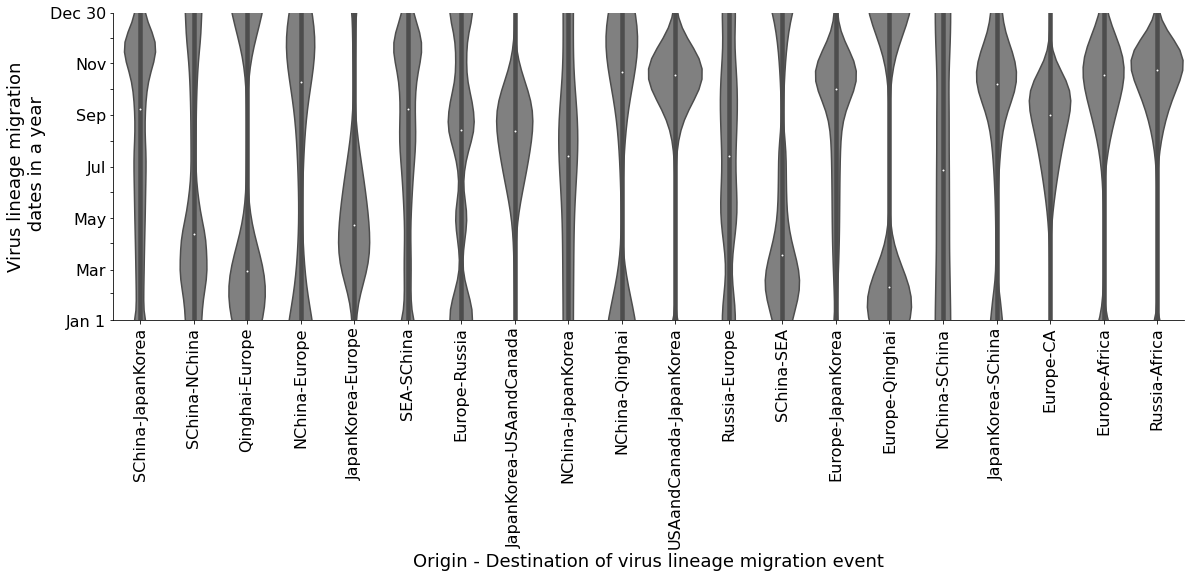

In [111]:
## violin plot
#fig = plt.figure(figsize=(20,20))
g = sns.catplot(
    x="od", 
    y="days", kind="violin", split=True,
    data=clade34_bf3,width=1,color= 'grey')
g.fig.set_figwidth(20)
g.fig.set_figheight(5)

plt.xticks(rotation=90,fontsize=16)
plt.yticks(ticks=[0,32,60,91,121,152,182,213,244,274,305,335,
                  365,397,425,456,486,517,547,578,609,639,670,700,
                  730,762,790,821,851,882,912,943,974,1004,1035,1065],
           labels=['Jan 1','','Mar','','May','','Jul','','Sep','','Nov','',
                  'Jan 1','','Mar','','May','','Jul','','Sep','','Nov','',
                  'Dec 30','','Mar','','May','','Jul','','Sep','','Nov',''],fontsize=16)
plt.xlabel('Origin - Destination of virus lineage migration event',fontsize=18)
plt.ylabel('Virus lineage migration\n dates in a year',fontsize=18)
plt.ylim([365,730])
#plt.show()
g.savefig('../output/clade2.3.4.4_jumps_bf3_violinpl_short.pdf')

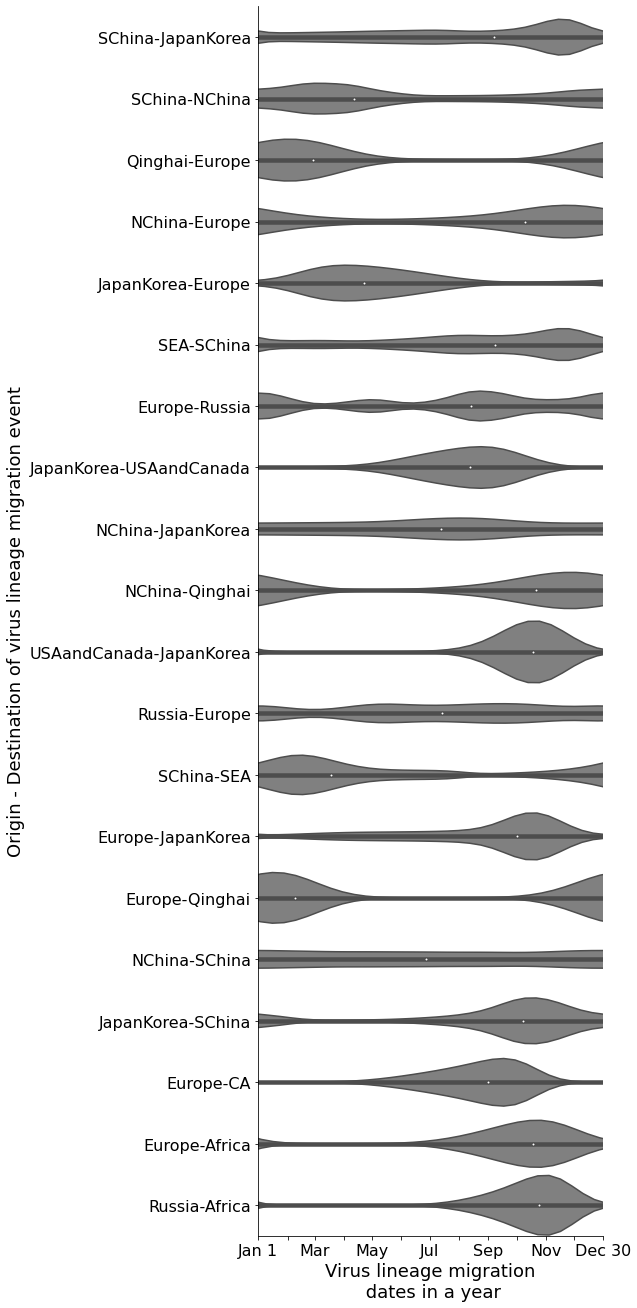

In [109]:
## violin plot 2 
#fig = plt.figure(figsize=(20,20))
g = sns.catplot(
    y="od", 
    x="days", kind="violin", split=True,
    data=clade34_bf3,width=1,color= 'grey')
g.fig.set_figwidth(10)
g.fig.set_figheight(20)

plt.yticks(fontsize=16)
plt.xticks(ticks=[0,32,60,91,121,152,182,213,244,274,305,335,
                  365,397,425,456,486,517,547,578,609,639,670,700,
                  730,762,790,821,851,882,912,943,974,1004,1035,1065],
           labels=['Jan 1','','Mar','','May','','Jul','','Sep','','Nov','',
                  'Jan 1','','Mar','','May','','Jul','','Sep','','Nov','',
                  'Dec 30','','Mar','','May','','Jul','','Sep','','Nov',''],fontsize=16)
plt.ylabel('Origin - Destination of virus lineage migration event',fontsize=18)
plt.xlabel('Virus lineage migration\n dates in a year',fontsize=18)
plt.xlim([365,730])
#plt.show()
g.savefig('../output/clade2.3.4.4_jumps_bf3_violinpl2.pdf')

### Disribution of earliest virus lineage migration event in a year

In [ ]:
clade34_mindatInYr_bf3 = clade34_bf3.groupby(['treeNumber','od'])['dateinyear'].min().reset_index()
clade34_mindatInYr_bf3['days']=clade34_mindatInYr_bf3['dateinyear']*365
clade34_mindatInYr_bf3 = clade34_mindatInYr_bf3.sort_values('od')

In [ ]:
clade34_mindatInYr_bf3['od'] = pd.Categorical(clade34_mindatInYr_bf3['od'], NS_order34)
clade34_mindatInYr_bf3 = clade34_mindatInYr_bf3.sort_values("od")

In [ ]:
fig34 = plt.figure(figsize=(20, 7))
plt.xticks(rotation=90,fontsize=16)
plt.yticks(ticks=[0,30,60,90,120,150,180,210,240,270,300,330,365],
           labels=['Jan 1','','Mar','','May','','Jul','','Sep','','Nov','','Dec 31'],
           fontsize=16)
bwp_34 = sns.boxplot(
    x="od", 
    y="days", 
    data=clade34_mindatInYr_bf3, 
    whis=[2.5,97.5])
plt.xlabel('Origin - Destination of virus lineage migration event',fontsize=18)
plt.ylabel('Earliest virus lineage\n migration dates in a year',fontsize=18)
plt.tight_layout()
fig34.savefig('../output/clade2.3.4.4_earliest_jumps_bf3.svg')

In [ ]:
c34_minDIY_dis = clade34_mindatInYr_bf3.groupby(['od'])['days'].describe(percentiles=[.025, .25, .5, .75, .975])
c34_minDIY_dis.to_csv('../data/2.3.4.4_mj_minDateInYear_dis.csv')
c34_minDIY_dis

### Virus lineage migration distribution over months

In [ ]:
from scipy import stats

In [ ]:
fig2, axes2 = plt.subplots(10,9,figsize=(80,80),dpi=100,sharex=True, sharey=True)

for i, (ax, od) in enumerate(zip(axes2.flatten(), clade34.od.unique())):
    x = clade34.loc[clade34.od==od, 'dateinyear']
    
    res = stats.relfreq(x, numbins=12)
    x_space = res.lowerlimit + np.linspace(0, res.binsize*res.frequency.size,
                                 res.frequency.size)
    ax.bar(x_space,res.frequency,width=res.binsize)
    #ax.hist(x, alpha=0.5, bins=365, density=True, stacked=True, label=od)
    ax.set_title(od)
    ax.set_xlim([x_space.min(), x_space.max()])
    
plt.suptitle('Probability Histogram of date of Markov jump events', y=1.05, size=16)
#ax.set_xlim(0, 1); ax.set_ylim(0, 10);
fig2.savefig('MJ_Dis_Clade2.3.4.4_monthly2.pdf')   # save the figure to file
plt.close(fig2)    # close the figure window

In [ ]:
fig, axes = plt.subplots(2,5,figsize=(25,10),dpi=100,sharex=True, sharey=True)

for i, (ax, origin) in enumerate(zip(axes.flatten(), clade34.origin.unique())):
    x = clade34.loc[clade34.origin==origin, 'dateinyear']
    
    #res = stats.relfreq(x, numbins=12)
    #x_space = res.lowerlimit + np.linspace(0, res.binsize*res.frequency.size,
    #                             res.frequency.size)
    #ax.bar(x_space,res.frequency,width=res.binsize)
    ax.hist(x, alpha=0.5, bins=12, density=True, stacked=True, label=origin, edgecolor='black')
    ax.set_title('Markov jump from ' + origin)
    ax.set_ylabel('Frequency density')
    ax.set_xticks([1/12,1/6,1/4,1/3,5/12,1/2,7/12,2/3,3/4,5/6,11/12,1])
    ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],rotation=45)
    #ax.set_xlim([x_space.min(), x_space.max()])
    #ax.set_xlim(0,1)
    
#plt.suptitle('Probability Histogram of date of Markov jump events', y=1.05, size=16)
ax.set_xlim(0, 1); 
plt.tight_layout();
fig.savefig('WAI_data/MJ_Dis_Clade2.3.4.4_monthly_origin_density.pdf')   # save the figure to file
plt.close(fig)    # close the figure window

In [ ]:
fig, axes = plt.subplots(2,5,figsize=(25,10),dpi=100,sharex=True, sharey=True)

for i, (ax, destination) in enumerate(zip(axes.flatten(), clade34.destination.unique())):
    x = clade34.loc[clade34.destination==destination, 'dateinyear']
    
    #res = stats.relfreq(x, numbins=12)
    #x_space = res.lowerlimit + np.linspace(0, res.binsize*res.frequency.size,
    #                             res.frequency.size)
    #ax.bar(x_space,res.frequency,width=res.binsize)
    ax.hist(x, alpha=0.5, bins=12, density=True, stacked=True, label=destination, edgecolor='black')
    ax.set_title('Markov jump to ' + destination)
    ax.set_ylabel('Frequency density')
    ax.set_xticks([1/12,1/6,1/4,1/3,5/12,1/2,7/12,2/3,3/4,5/6,11/12,1])
    ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],rotation=45)
    #ax.set_xlim([x_space.min(), x_space.max()])
    #ax.set_xlim(0,1)
    
#lt.suptitle('Probability Histogram of date of Markov jump events', y=1.05, size=16)
ax.set_xlim(0, 1); 
plt.tight_layout();
fig.savefig('WAI_data/MJ_Dis_Clade2.3.4.4_monthly_destination_density.pdf')   # save the figure to file
plt.close(fig)    # close the figure window

In [ ]:
freq_clade34_dest = pd.DataFrame(columns=['dest_location','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
for i, (destination) in enumerate(clade34.destination.unique()):
    x=clade34.loc[clade34.destination==destination,'dateinyear']
    res=stats.relfreq(x,numbins=12)
    freql = res.frequency.tolist()
    freq_clade34_dest.loc[i] = [destination] + freql

freq_clade34_dest

In [ ]:
freq_clade34 = pd.DataFrame(columns=['origin_location','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
for i, (origin) in enumerate(clade34.origin.unique()):
    x=clade34.loc[clade34.origin==origin,'dateinyear']
    res=stats.relfreq(x,numbins=12)
    freql = res.frequency.tolist()
    freq_clade34.loc[i] = [origin] + freql

freq_clade34

In [ ]:
birdProb34 = pd.read_csv('../data/2.3.4.4_bird.csv')
birdProb34.head()

In [ ]:
corr_mj_bird_34_orig = pd.DataFrame(columns=['origin_location','bird_order','correlation_coefficient','p_value'])
i=0
for location in birdProb34.Location.unique():
    mj = freq_clade34.loc[freq_clade34.origin_location==location,['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]
    for bird in ['Accipitriformes','Anseriformes','Charadriiformes','Ciconiiformes','Falconiformes',
                 'Gruiformes','Passeriformes','Pelecaniformes','Suliformes']:
        birdProb = birdProb34.loc[birdProb34.Location==location,[bird+'1',bird+'2',bird+'3',bird+'4',bird+'5',
                                                                 bird+'6',bird+'7',bird+'8',bird+'9',bird+'10',bird+'11',bird+'12']]
        
        cor,p = stats.pearsonr(mj.values[0],birdProb.values[0])
        corr_mj_bird_34_orig.loc[i]= [location] + [bird] + [cor] + [p]
        
        i=i+1
        
corr_mj_bird_34_orig

In [ ]:
import statsmodels.api as sm

corr_mj_bird_34_orig = pd.DataFrame(columns=['origin_location','bird_order','correlation_coefficient','p_value'])
i=0
for location in birdProb34.Location.unique():
    mj = freq_clade34.loc[freq_clade34.origin_location==location,['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]
    for bird in ['Accipitriformes','Anseriformes','Charadriiformes','Ciconiiformes','Falconiformes',
                 'Gruiformes','Passeriformes','Pelecaniformes','Suliformes']:
        birdProb = birdProb34.loc[birdProb34.Location==location,[bird+'1',bird+'2',bird+'3',bird+'4',bird+'5',
                                                                 bird+'6',bird+'7',bird+'8',bird+'9',bird+'10',bird+'11',bird+'12']]
        
        cor = sm.tsa.stattools.ccf(mj.values[0],birdProb.values[0], adjusted=False)
        corr_mj_bird_34_orig.loc[i]= [location] + [bird] + [cor]
        
        i=i+1
        
corr_mj_bird_34_orig

In [ ]:
corr_mj_bird_34_dest = pd.DataFrame(columns=['dest_location','bird_order','correlation_coefficient','p_value'])
i=0
for location in birdProb34.Location.unique():
    mj = freq_clade34_dest.loc[freq_clade34_dest.dest_location==location,['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]
    for bird in ['Accipitriformes','Anseriformes','Charadriiformes','Ciconiiformes','Falconiformes',
                 'Gruiformes','Passeriformes','Pelecaniformes','Suliformes']:
        birdProb = birdProb34.loc[birdProb34.Location==location,[bird+'1',bird+'2',bird+'3',bird+'4',bird+'5',
                                                                 bird+'6',bird+'7',bird+'8',bird+'9',bird+'10',bird+'11',bird+'12']]
        cor,p = stats.pearsonr(mj.values[0],birdProb.values[0])
        corr_mj_bird_34_dest.loc[i]= [location] + [bird] + [cor] + [p]
        i=i+1
        
corr_mj_bird_34_dest

In [ ]:
corr_mj_bird_34_dest.to_csv('../data/corr_mj_bird_34_dest.csv')
corr_mj_bird_34_orig.to_csv('../data/corr_mj_bird_34_orig.csv')